# Just Look At It and Understanding Things

In [57]:
# Outside imports
import pandas as pd
import numpy as np
import os
from IPython.display import display
from plotly.offline import (download_plotlyjs,
                            init_notebook_mode)
from plotly.offline import plot_mpl
init_notebook_mode(connected=True)

# Load the Phenotypic data and clean it up
BASE = "/home/nitin/hopkins/fall2017/ndd/kpf/"

# Load the lemur library
import sys
sys.path.append("../../..")
import lemur.datasets as lds
import lemur.metrics as lms
import lemur.plotters as lpl
import lemur.embedders as leb

# Create a lemur dataset based on the phenotypic data
pheno = lds.CSVDataSet(BASE + "hbn_cleaned.csv", 
                       index_column = "Identifiers",
                       column_level_names = ("Instrument", "Variable"),
                       name="Phenotypic")

# Create a lemur distance matrix based on the phenotypic data
#DM = lds.DistanceMatrix(DFD, lms.NanDotProduct)

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
lpl.ColumnDistributionPlotter(pheno).plot(0)

In [5]:
lpl.ColumnDistributionPlotter(pheno).plot(1)

## Real Data

- Ordinal aspects of phenotypic data

## Exploratory Factor Analysis

- Uncover underlying structure of large set of variables
- Identify underlying relationships between measured variables
- Based on **common factor model:**
    - Variable = function of:
        - Common factors (affects 2 + more variables)
        - Unique factors
        - Errors of measurements
        
## Evaluation:

- Vidur's 6th sense

In [13]:
import sklearn.decomposition as dcmp

In [65]:
p_fa = dcmp.FactorAnalysis(n_components=1)

In [67]:
p_fa.fit(np.nan_to_num(pheno.D))

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=1,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [70]:
p_fa.transform(np.nan_to_num(pheno.D))

array([[-0.8907537 ],
       [-0.88474777],
       [ 0.41188946],
       [ 1.03776978],
       [ 1.29699891],
       [ 1.38795444],
       [-0.89151117],
       [ 0.96544553],
       [ 1.17946215],
       [ 1.10327791],
       [-0.84234582],
       [ 1.29872895],
       [ 0.42120357],
       [-0.92420276],
       [-0.69354617],
       [-0.70918027],
       [ 1.27729965],
       [-0.68489812],
       [ 1.05082197],
       [ 0.98364605],
       [ 1.30245672],
       [ 0.17639023],
       [ 1.22023464],
       [ 1.21312327],
       [ 0.71095337],
       [-0.895085  ],
       [-0.94550353],
       [ 1.31505773],
       [ 1.44684966],
       [-0.85696696],
       [-0.80482773],
       [-0.79786229],
       [-0.87744443],
       [ 1.18866854],
       [-0.86852572],
       [ 1.45044172],
       [ 1.03519662],
       [ 1.49112802],
       [ 0.70487098],
       [ 1.15709368],
       [-0.85746497],
       [ 1.43075651],
       [ 1.02928188],
       [ 0.84375419],
       [-0.92215345],
       [ 1

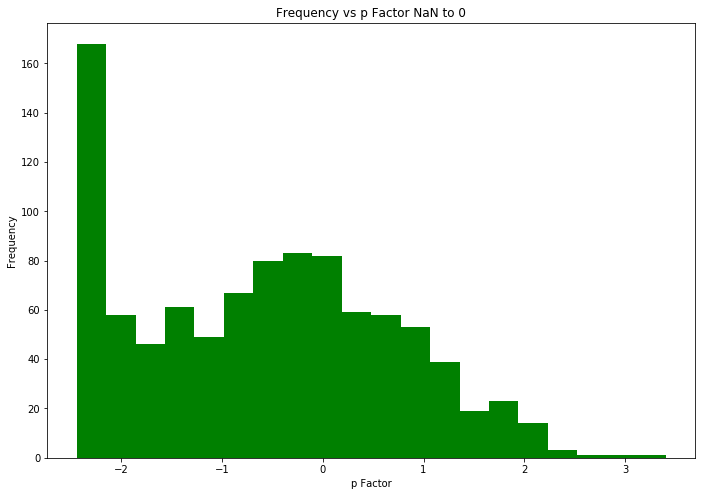

In [90]:
fig = plt.figure(figsize=(12, 8))

n, bins, patches = plt.hist(p_fa.transform(np.nan_to_num(pheno.D)), 20, facecolor='green')

plt.xlabel('p Factor')
plt.ylabel('Frequency')
plt.subplots_adjust(left=0.15)
plt.title('Frequency vs p Factor NaN to 0')


plt.show()

In [61]:
print(pheno.D.shape)

(965, 69)


In [72]:
import scipy.stats as stats

In [88]:
pheno_nmean = np.copy(pheno.D)
means = np.nanmean(pheno_nmean, axis=0)
for (i, j) in zip(*np.where(np.isnan(pheno_nmean))):
    pheno_nmean[i, j] = means[j]

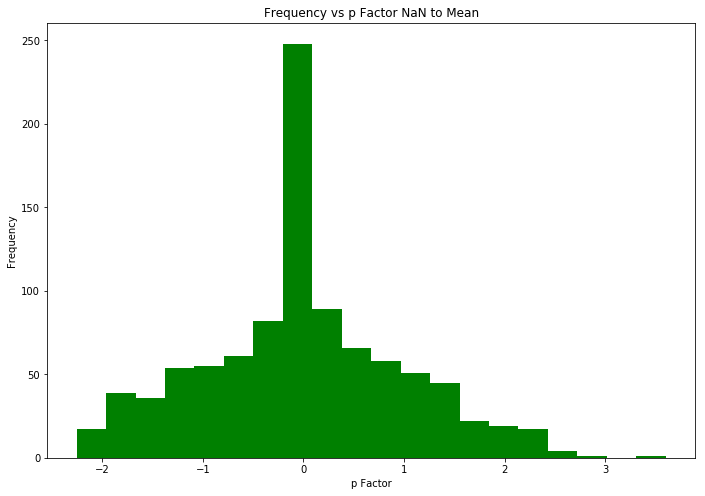

In [91]:
p_fa = dcmp.FactorAnalysis(n_components=1)
p_fa.fit(pheno_nmean)

fig = plt.figure(figsize=(12, 8))

n, bins, patches = plt.hist(p_fa.transform(pheno_nmean), 20, facecolor='green')

plt.xlabel('p Factor')
plt.ylabel('Frequency')
plt.subplots_adjust(left=0.15)
plt.title('Frequency vs p Factor NaN to Mean')


plt.show()